# HW3 - Big Data Management

### By Natalia Beltrán & Mikel Gallo 

# Data Management Backbone 

In [2]:
## Imports 
import os 
import sys 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
import re
from pyspark.sql.functions import explode, col, count 


In [3]:
appName = "BigDataHW3"
master = "local[*]" # Spark will use all cores (*) available
if not 'spark' in globals(): 
    conf = SparkConf().setAppName(appName).setMaster(master)
    spark = SparkSession.builder \
        .config(conf=conf) \
        .getOrCreate()

24/06/16 01:25:40 WARN Utils: Your hostname, MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.1.130 instead (on interface en0)
24/06/16 01:25:40 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/16 01:25:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [340]:
# appName = "DataManagementHW3"
# master = "local[*]" # Spark will use all cores (*) available
# if not 'spark' in globals(): # This 'trick' makes sure the SparkContext sc is initialized exactly once
#   conf = SparkConf().setAppName(appName).setMaster(master)
#   spark = SparkSession.builder.appName("DataManagementHW3").config(conf=conf).getOrCreate()

# # ### Session in spark
# spark = SparkSession.builder.appName("DataManagementHW3").getOrCreate()

# A Tasks for the Data Management Backbone 

### A.1 Explore the data and choose the KPIs

Creating the necessary local file system

If notebook is run, please remember to adapt all paths to own local paths

In [11]:
## Creating Landing zone file data exploration 
landing_zone_path = './LandingZone/' ## landing zone
formatted_zone_path = './FormattedZone/' ## formatted zone
exploitation_zone_path = './ExploitationZone/' ## exploitation zone


## directories 
#os.makedirs(landing_zone_path, exist_ok=True)
#os.makedirs(formatted_zone_path, exist_ok=True)
#os.makedirs(exploitation_zone_path, exist_ok=True)


## Files
'''The files chosen for the exploration is the data from the Cultural sites, Income and Price open data. These were manually moved to the LandingZone'''

'The files chosen for the exploration is the data from the Cultural sites, Income and Price open data. These were manually moved to the LandingZone'

### A.2 Data Formatting Process

In [4]:
## for the purpose of cleaning the text data 

def comprehensive_clean(s):
    if isinstance(s, str):
        s = s.strip().lower()  
        s = re.sub(r'[^a-zA-Z\s]', '', s)  
        s = re.sub(r'\s+', ' ', s)  
        return s
    return s

**Cultural Sites**

**Landing Zone** Culture data

In [10]:
## grabing from landing zone 
cultural_df = pd.read_csv(os.path.join(landing_zone_path, '2023-04-20.csv'))
cultural_df.head()

,addresses_roadtype_name,addresses_end_street_number,values_attribute_name,addresses_road_name,values_category,addresses_zip_code,values_value,addresses_town,geo_epgs_4326_y,geo_epgs_4326_x,...,addresses_road_id,created,geo_epgs_25831_y,institution_name,modified,values_description,values_id,addresses_neighborhood_name,values_outstanding,values_attribute_id
0,NaN,NaN,E-mail,C Esteve Terradas,Informació d'interès,8023,pvirgili@perevirgili.catsalut.net,BARCELONA,2.140266,41.414955,...,116901,1988-03-14T00:00:00,4.585179e+06,NaN,2022-09-21T19:13:34.303475,NaN,40212.0,Vallcarca i els Penitents,True,100002.0
1,NaN,NaN,Web,C Fulton,Informació d'interès,8032,http://lameva.barcelona.cat/horta-guinardo/ca/...,BARCELONA,2.161502,41.429994,...,137209,2015-05-26T12:24:46,4.586832e+06,NaN,2021-09-09T02:14:37.921873,NaN,95717.0,Horta,True,100003.0
2,NaN,NaN,NaN,Pl Lesseps,NaN,8023,NaN,BARCELONA,2.151087,41.407712,...,123408,2015-05-26T13:26:20,4.584366e+06,NaN,2021-09-09T02:14:44.349060,NaN,NaN,la Vila de Gràcia,NaN,NaN
3,NaN,NaN,E-mail,C Ramon Trias Fargas,Informació d'interès,8005,info@idec.upf.edu,BARCELONA,2.190872,41.390029,...,132908,2015-05-26T17:06:23,4.582371e+06,NaN,2022-09-09T12:06:57.108133,NaN,57030.0,la Vila Olímpica del Poblenou,True,100002.0
4,NaN,NaN,Web,Pg Vall d'Hebron,Informació d'interès,8035,http://www.ub.edu/campusmundet/,BARCELONA,2.147158,41.435755,...,352507,2015-05-26T17:35:12,4.587483e+06,NaN,2022-09-09T12:07:54.518743,NaN,95719.0,Montbau,True,100003.0


In [12]:
cultural_df.columns

Index(['addresses_roadtype_name', 'addresses_end_street_number',
       'values_attribute_name', 'addresses_road_name', 'values_category',
       'addresses_zip_code', 'values_value', 'addresses_town',
       'geo_epgs_4326_y', 'geo_epgs_4326_x', 'addresses_district_name',
       'geo_epgs_25831_x', 'addresses_start_street_number', 'register_id',
       'institution_id', 'addresses_main_address', 'addresses_district_id',
       'addresses_roadtype_id', 'addresses_type', 'addresses_neighborhood_id',
       '_id', 'name', 'addresses_road_id', 'created', 'geo_epgs_25831_y',
       'institution_name', 'modified', 'values_description', 'values_id',
       'addresses_neighborhood_name', 'values_outstanding',
       'values_attribute_id'],
      dtype='object')

In [13]:
cultural_dfinal = cultural_df[['addresses_road_name', 'values_category', 'values_attribute_name','addresses_type', 'addresses_zip_code', 'addresses_town', 'addresses_district_name', 'addresses_neighborhood_name', 'values_id']]
cultural_dfinal['addresses_neighborhood_name'] = cultural_dfinal['addresses_neighborhood_name'].apply(comprehensive_clean) 

/var/folders/pv/kfw019zx6lq5tdq_s52kkbzc0000gn/T/ipykernel_42034/262427436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cultural_dfinal['addresses_neighborhood_name'] = cultural_dfinal['addresses_neighborhood_name'].apply(comprehensive_clean)


**Formatted Zone** Culture data

In [14]:
## Convert to PySpark -> save to Formatted Zone 
df_culture = spark.createDataFrame(cultural_dfinal)
df_culture.write.partitionBy("addresses_district_name").parquet(os.path.join(formatted_zone_path, "CulturalSites/cultural_data.parquet"), mode='overwrite')
# df_culture.write.partitionBy("addresses_district_name").parquet(os.path.join(formatted_zone_path, "cultural_data.parquet"), mode='overwrite')

24/06/16 01:30:09 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 96.54% for 7 writers
24/06/16 01:30:09 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 84.47% for 8 writers
24/06/16 01:30:09 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 75.08% for 9 writers
24/06/16 01:30:09 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 67.58% for 10 writers
24/06/16 01:30:09 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 61.43% for 11 writers
24/06/16 01:30:09 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 67.58% for 10 writers
24/06/16 01:30:09 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,

**A.4 Spark Query** Cultural

In [15]:
cultural_formatted_path = os.path.join(formatted_zone_path, "CulturalSites/cultural_data.parquet")
cultural_data = spark.read.parquet(cultural_formatted_path)

# Register DataFrame as a temporary view
cultural_data.createOrReplaceTempView("cultural_sites")

## aggregate by district number of sites
query_cultural = """
SELECT addresses_district_name AS District, COUNT(*) AS NumberOfSites
FROM cultural_sites
GROUP BY addresses_district_name
ORDER BY NumberOfSites DESC
"""

result_df_cultural = spark.sql(query_cultural)
result_df_cultural.show(10, truncate=False)

+-------------------+-------------+
|District           |NumberOfSites|
+-------------------+-------------+
|Gràcia             |135          |
|Ciutat Vella       |124          |
|Sarrià-Sant Gervasi|119          |
|Sant Andreu        |98           |
|Sants-Montjuïc     |91           |
|Eixample           |88           |
|Les Corts          |75           |
|Sant Martí         |60           |
|Horta-Guinardó     |52           |
|Nou Barris         |29           |
+-------------------+-------------+



**Price Open Data**

**Landing Zone** Price opendata data

In [17]:
price_file_path = os.path.join(landing_zone_path, 'price_opendata_neighborhood.json')
price_df = spark.read.json(price_file_path)
price_df.show(5, truncate=False)

+---+-----------+-------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------+
|_id|district_id|district_name|info                                                                                                                                                                                                                                                                     |neigh_name                           |
+---+-----------+-------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------

In [18]:
price_df.printSchema()

root
 |-- _id: long (nullable = true)
 |-- district_id: long (nullable = true)
 |-- district_name: string (nullable = true)
 |-- info: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- Amount: double (nullable = true)
 |    |    |-- PerMeter: double (nullable = true)
 |    |    |-- diffAmount: double (nullable = true)
 |    |    |-- diffPerMeter: double (nullable = true)
 |    |    |-- usedAmount: double (nullable = true)
 |    |    |-- usedPerMeter: double (nullable = true)
 |    |    |-- year: long (nullable = true)
 |-- neigh_name : string (nullable = true)



In [19]:
## need to take out the information that is in the info column and create its own columns with it 

flattened_pice_df = price_df.select("_id", "district_id", "district_name", col("neigh_name ").alias("neigh_name"), explode("info").alias("info"))


price_df_expanded = flattened_pice_df.select(
    "_id", 
    "district_id", 
    "district_name", 
    "neigh_name",
    "info.year", 
    "info.Amount", 
    "info.PerMeter", 
    "info.diffAmount", 
    "info.diffPerMeter", 
    "info.usedAmount", 
    "info.usedPerMeter"
)

price_df_expanded.show(5, truncate=False)

+---+-----------+-------------+----------+----+------+--------+----------+------------+----------+------------+
|_id|district_id|district_name|neigh_name|year|Amount|PerMeter|diffAmount|diffPerMeter|usedAmount|usedPerMeter|
+---+-----------+-------------+----------+----+------+--------+----------+------------+----------+------------+
|1  |1          |Ciutat Vella |el Raval  |2013|97.0  |1726.5  |NULL      |NULL        |97.0      |1726.5      |
|1  |1          |Ciutat Vella |el Raval  |2014|141.7 |2087.6  |99.1      |2534.3      |143.1     |2073.5      |
|1  |1          |Ciutat Vella |el Raval  |2015|193.8 |2401.9  |NULL      |NULL        |193.8     |2401.9      |
|1  |1          |Ciutat Vella |el Raval  |2016|181.0 |2805.2  |NULL      |NULL        |180.7     |2798.6      |
|1  |1          |Ciutat Vella |el Raval  |2017|240.3 |3469.9  |292.5     |3633.1      |240.0     |3468.9      |
+---+-----------+-------------+----------+----+------+--------+----------+------------+----------+------

**Formatted Zone** Price opendata data

In [20]:
def row_to_dict(row):
    return row.asDict()

dict_pice_df = price_df_expanded.rdd.map(row_to_dict)

In [21]:
price_df_expanded = spark.createDataFrame(dict_pice_df)

output_parquet_path = os.path.join(formatted_zone_path, "PriceOpenData/pice_data_expanded.parquet")
# output_parquet_path = os.path.join(formatted_zone_path, "pice_data_expanded.parquet")
price_df_expanded.write.partitionBy("district_name").parquet(output_parquet_path, mode='overwrite')


**A.4 Spark Query** Price Open Data 

In [22]:
## register DataFrame as a temporary view
price_df_expanded.createOrReplaceTempView("price_data")

## aggregate Amount by district_name and year
query_price = """
SELECT district_name AS District, year AS Year, SUM(Amount) AS TotalAmount
FROM price_data
GROUP BY district_name, year
ORDER BY District, Year
"""

result_df_price = spark.sql(query_price)
result_df_price.show(10, truncate=False)



+------------+----+------------------+
|District    |Year|TotalAmount       |
+------------+----+------------------+
|Ciutat Vella|2013|675.3             |
|Ciutat Vella|2014|778.5999999999999 |
|Ciutat Vella|2015|979.1000000000001 |
|Ciutat Vella|2016|1109.1            |
|Ciutat Vella|2017|1225.0            |
|Eixample    |2013|1485.9            |
|Eixample    |2014|1605.1000000000001|
|Eixample    |2015|1785.9            |
|Eixample    |2016|1865.3            |
|Eixample    |2017|2185.7000000000003|
+------------+----+------------------+
only showing top 10 rows



**Income**

**Landing Zone** Income data

In [24]:
income_directory =  os.path.join(landing_zone_path, 'income/')
income_files = [file for file in os.listdir(income_directory) if file.endswith('.csv')]

## looked at data to see how to move to formatted section 
dfs = [pd.read_csv(os.path.join(income_directory, file)) for file in income_files]
income_df = pd.concat(dfs, ignore_index=True)
income_df.head(5)

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Població,Índex RFD Barcelona = 100
0,2011,1,Ciutat Vella,1,el Raval,48485,65.0
1,2011,1,Ciutat Vella,2,el Barri Gòtic,17257,98.8
2,2011,1,Ciutat Vella,3,la Barceloneta,15674,73.1
3,2011,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",22632,86.1
4,2011,2,Eixample,5,el Fort Pienc,32348,97.9


In [25]:
income_df['Any'].unique() ## checked that all the csv from all separate years got combined 

array([2011, 2013, 2010, 2007, 2012, 2014, 2016, 2009, 2015, 2017, 2008])

In [26]:
## cleaning text just in case

# Rename columns
income_df = income_df.rename(columns={"Població": "Population", "Índex RFD Barcelona = 100": "Index"})


income_df['Nom_Barri'] = income_df['Nom_Barri'].apply(comprehensive_clean) 

**Formatted Zone** Income data

In [27]:
df_income = spark.createDataFrame(income_df)
df_income.write.partitionBy("Nom_Districte").parquet(os.path.join(formatted_zone_path, "Income/income_data.parquet"), mode='overwrite')

24/06/16 01:37:58 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 96.54% for 7 writers
24/06/16 01:37:58 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 84.47% for 8 writers
24/06/16 01:37:58 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 75.08% for 9 writers
24/06/16 01:37:58 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 67.58% for 10 writers
24/06/16 01:37:58 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 61.43% for 11 writers
24/06/16 01:37:58 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 67.58% for 10 writers
24/06/16 01:37:58 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,

**A.4 Spark Query** Income data

In [28]:
## register DataFrame as a temporary view
df_income.createOrReplaceTempView("income_data")

## aggregate total population by district and year 
query_income = """
SELECT Nom_Districte AS District, Any AS Year, SUM(Population) AS TotalPopulation
FROM income_data
GROUP BY District, Year
ORDER BY District, Year
"""

result_df_income = spark.sql(query_income)
result_df_income.show(10, truncate=False)


+------------+----+---------------+
|District    |Year|TotalPopulation|
+------------+----+---------------+
|Ciutat Vella|2007|113034         |
|Ciutat Vella|2008|111636         |
|Ciutat Vella|2009|109847         |
|Ciutat Vella|2010|106849         |
|Ciutat Vella|2011|104048         |
|Ciutat Vella|2012|105216         |
|Ciutat Vella|2013|103944         |
|Ciutat Vella|2014|102237         |
|Ciutat Vella|2015|100227         |
|Ciutat Vella|2016|100451         |
+------------+----+---------------+
only showing top 10 rows



### A.3 Move Data to the Exploitation Zone 

<h3>Cultural Data</h3>

In [29]:
## inspecting data from formatted zone 
Cultural = spark.read.parquet('FormattedZone/CulturalSites/')
print("Partitions: ",Cultural.rdd.glom().collect())
Cultural.show(5)

Partitions:  [[Row(addresses_road_name='Pl Pompeu Gener', values_category='NaN', values_attribute_name='NaN', addresses_type=nan, addresses_zip_code=8003, addresses_town='BARCELONA', addresses_neighborhood_name='la barceloneta', values_id=nan, addresses_district_name='Ciutat Vella'), Row(addresses_road_name='C Aurora', values_category='NaN', values_attribute_name='NaN', addresses_type=nan, addresses_zip_code=8001, addresses_town='BARCELONA', addresses_neighborhood_name='el raval', values_id=nan, addresses_district_name='Ciutat Vella'), Row(addresses_road_name='C Palma de Sant Just', values_category='NaN', values_attribute_name='NaN', addresses_type=nan, addresses_zip_code=8002, addresses_town='BARCELONA', addresses_neighborhood_name='el barri gtic', values_id=nan, addresses_district_name='Ciutat Vella'), Row(addresses_road_name='Pl Nova', values_category="Informació d'interès", values_attribute_name='E-mail', addresses_type=nan, addresses_zip_code=8002, addresses_town='BARCELONA', addr

In [30]:
## changing column name to match those of other datasets
Cultural_final = Cultural.withColumnRenamed("addresses_district_name", "District") \
    .withColumnRenamed("addresses_neighborhood_name", "Neighborhood_Name") \
        .withColumnRenamed("addresses_road_name", "Addresses_Road_Name") \
            .withColumnRenamed("values_category", "Values_Category") \
                .withColumnRenamed("values_attribute_name", "Values_Attribute_Name") \
                    .withColumnRenamed("addresses_type", "Addresses_Type") \
                        .withColumnRenamed("addresses_zip_code", "Addresses_Zip_Code") \
                            .withColumnRenamed("addresses_town", "Addresses_Town") \
                                .withColumnRenamed("values_id", "Values_Id") 

    
Cultural_final.show(5)

+--------------------+--------------------+---------------------+--------------+------------------+--------------+-----------------+---------+------------+
| Addresses_Road_Name|     Values_Category|Values_Attribute_Name|Addresses_Type|Addresses_Zip_Code|Addresses_Town|Neighborhood_Name|Values_Id|    District|
+--------------------+--------------------+---------------------+--------------+------------------+--------------+-----------------+---------+------------+
|     Pl Pompeu Gener|                 NaN|                  NaN|           NaN|              8003|     BARCELONA|   la barceloneta|      NaN|Ciutat Vella|
|            C Aurora|                 NaN|                  NaN|           NaN|              8001|     BARCELONA|         el raval|      NaN|Ciutat Vella|
|C Palma de Sant Just|                 NaN|                  NaN|           NaN|              8002|     BARCELONA|    el barri gtic|      NaN|Ciutat Vella|
|             Pl Nova|Informació d'interès|               E-mail

**Exploitation zone** Cultural data

In [31]:
## saving data to exploitation zone (both as parquet and csv to help with section B)
parquet_output_path_culture = os.path.join(exploitation_zone_path, "CulturalSites/cultural_data_final.parquet")
csv_output_path_culture = os.path.join(exploitation_zone_path, "CulturalSites/cultural_data_final.csv")

## saving parquet 
Cultural_final.write.partitionBy("District").parquet(parquet_output_path_culture, mode='overwrite')

## saving last to csv 
Cultural_final.coalesce(1).write.option("header", "true").mode('overwrite').csv(csv_output_path_culture)
print(f"Data saved to {parquet_output_path_culture} and {csv_output_path_culture}")


24/06/16 01:39:13 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 96.54% for 7 writers
24/06/16 01:39:13 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 84.47% for 8 writers
24/06/16 01:39:13 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 75.08% for 9 writers
24/06/16 01:39:13 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 67.58% for 10 writers
24/06/16 01:39:13 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 61.43% for 11 writers
24/06/16 01:39:13 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 67.58% for 10 writers
24/06/16 01:39:13 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,

Data saved to ./ExploitationZone/CulturalSites/cultural_data_final.parquet and ./ExploitationZone/CulturalSites/cultural_data_final.csv


<h3>Price opendata data</h3>

In [32]:
## inspecting data from formatted zone 
Price = spark.read.parquet('FormattedZone/PriceOpenData/')
print("Partitions: ",Price.rdd.glom().collect())
Price.show(5)

Partitions:  [[Row(Amount=275.5, PerMeter=2800.0, _id=63, diffAmount=348.0, diffPerMeter=3331.4, district_id=10, neigh_name="el Camp de l'Arpa del Clot", usedAmount=274.5, usedPerMeter=2793.3, year=2013, district_name='Sant Martí'), Row(Amount=252.3, PerMeter=2618.5, _id=63, diffAmount=250.2, diffPerMeter=2601.3, district_id=10, neigh_name="el Camp de l'Arpa del Clot", usedAmount=252.3, usedPerMeter=2618.7, year=2014, district_name='Sant Martí'), Row(Amount=234.5, PerMeter=2818.1, _id=63, diffAmount=None, diffPerMeter=None, district_id=10, neigh_name="el Camp de l'Arpa del Clot", usedAmount=234.5, usedPerMeter=2818.1, year=2015, district_name='Sant Martí'), Row(Amount=269.4, PerMeter=3331.6, _id=63, diffAmount=278.7, diffPerMeter=4332.4, district_id=10, neigh_name="el Camp de l'Arpa del Clot", usedAmount=269.2, usedPerMeter=3306.1, year=2016, district_name='Sant Martí'), Row(Amount=341.8, PerMeter=3988.8, _id=63, diffAmount=420.4, diffPerMeter=4871.0, district_id=10, neigh_name="el Cam

In [33]:
## cleaning dataframe

Price_final = Price.withColumnRenamed("district_name", "District") \
    .withColumnRenamed("neigh_name", "Neighborhood_Name") \
        .withColumnRenamed("usedAmount", "Used_Amount") \
            .withColumnRenamed("usedPerMeter", 'Used_Per_Meter') \
                .withColumnRenamed("year", 'Year') \
                    .withColumnRenamed("diffPerMeter", 'diff_Per_Meter') \
                        .withColumnRenamed("diffAmount", 'diff_Amount') \
                            .withColumnRenamed("PerMeter", 'Per_Meter') \
                                .withColumnRenamed("district_id", 'District_Id') 

Price_final.show(5)

+------+---------+---+-----------+--------------+-----------+--------------------+-----------+--------------+----+----------+
|Amount|Per_Meter|_id|diff_Amount|diff_Per_Meter|District_Id|   Neighborhood_Name|Used_Amount|Used_Per_Meter|Year|  District|
+------+---------+---+-----------+--------------+-----------+--------------------+-----------+--------------+----+----------+
| 275.5|   2800.0| 63|      348.0|        3331.4|         10|el Camp de l'Arpa...|      274.5|        2793.3|2013|Sant Martí|
| 252.3|   2618.5| 63|      250.2|        2601.3|         10|el Camp de l'Arpa...|      252.3|        2618.7|2014|Sant Martí|
| 234.5|   2818.1| 63|       NULL|          NULL|         10|el Camp de l'Arpa...|      234.5|        2818.1|2015|Sant Martí|
| 269.4|   3331.6| 63|      278.7|        4332.4|         10|el Camp de l'Arpa...|      269.2|        3306.1|2016|Sant Martí|
| 341.8|   3988.8| 63|      420.4|        4871.0|         10|el Camp de l'Arpa...|      336.3|        3927.3|2017|Sant

**Exploitation zone** Price Open Data data

In [34]:
## saving data to exploitation zone (both as parquet and csv to help with section B)
parquet_output_path_price = os.path.join(exploitation_zone_path, "PriceOpenData/price_data_final.parquet")
csv_output_path_price = os.path.join(exploitation_zone_path, "PriceOpenData/price_data_final.csv")

## saving parquet 
Price_final.write.partitionBy("District").parquet(parquet_output_path_price, mode='overwrite')

## saving last to csv 
Price_final.coalesce(1).write.option("header", "true").mode('overwrite').csv(csv_output_path_price)
print(f"Data saved to {parquet_output_path_price} and {csv_output_path_price}")

24/06/16 01:39:38 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 96.54% for 7 writers
24/06/16 01:39:38 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 84.47% for 8 writers
24/06/16 01:39:38 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 75.08% for 9 writers
24/06/16 01:39:38 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 67.58% for 10 writers
24/06/16 01:39:38 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 75.08% for 9 writers
24/06/16 01:39:38 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 84.47% for 8 writers
24/06/16 01:39:38 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,01

Data saved to ./ExploitationZone/PriceOpenData/price_data_final.parquet and ./ExploitationZone/PriceOpenData/price_data_final.csv


<h3>Income data</h3>

In [35]:
## inspecting data from formatted zone 
Income = spark.read.parquet('FormattedZone/Income/')
print("Partitions: ",Income.rdd.glom().collect())
Income.show(5)

Partitions:  [[Row(Any=2017, Codi_Districte=10, Codi_Barri=66, Nom_Barri='el parc i la llacuna del poblenou', Population=15204, Index='100.4', Nom_Districte='Sant Martí'), Row(Any=2017, Codi_Districte=10, Codi_Barri=67, Nom_Barri='la vila olmpica del poblenou', Population=9404, Index='164.2', Nom_Districte='Sant Martí'), Row(Any=2017, Codi_Districte=10, Codi_Barri=68, Nom_Barri='el poblenou', Population=33931, Index='99.9', Nom_Districte='Sant Martí'), Row(Any=2017, Codi_Districte=10, Codi_Barri=69, Nom_Barri='diagonal mar i el front martim del poblenou', Population=13710, Index='150.1', Nom_Districte='Sant Martí'), Row(Any=2017, Codi_Districte=10, Codi_Barri=70, Nom_Barri='el bess i el maresme', Population=22893, Index='60.4', Nom_Districte='Sant Martí'), Row(Any=2017, Codi_Districte=10, Codi_Barri=71, Nom_Barri='provenals del poblenou', Population=20649, Index='102.3', Nom_Districte='Sant Martí'), Row(Any=2017, Codi_Districte=10, Codi_Barri=72, Nom_Barri='sant mart de provenals', Pop

In [36]:
## cleaning dataframe
Income_final = Income.drop("Nom_Barri")

Income_final = Income_final.withColumnRenamed("Any", "Year") \
    .withColumnRenamed("Nom_Districte", "District") \
        .withColumnRenamed("Codi_Barri", "Neighborhood Code") \
            .withColumnRenamed("Codi_Districte", "District Code")

Income_final.show(5)

+----+-------------+-----------------+----------+-----+----------+
|Year|District Code|Neighborhood Code|Population|Index|  District|
+----+-------------+-----------------+----------+-----+----------+
|2017|           10|               66|     15204|100.4|Sant Martí|
|2017|           10|               67|      9404|164.2|Sant Martí|
|2017|           10|               68|     33931| 99.9|Sant Martí|
|2017|           10|               69|     13710|150.1|Sant Martí|
|2017|           10|               70|     22893| 60.4|Sant Martí|
+----+-------------+-----------------+----------+-----+----------+
only showing top 5 rows



**Exploitation zone** Income data

In [37]:
## saving data to exploitation zone 
parquet_output_path_income = os.path.join(exploitation_zone_path, "Income/income_data_final.parquet")
csv_output_path_income = os.path.join(exploitation_zone_path, "Income/income_data_final.csv")


In [38]:
## saving parquet 
Income_final.write.partitionBy("District").parquet(parquet_output_path_income, mode='overwrite')

## saving last to csv 
Income_final.coalesce(1).write.option("header", "true").mode('overwrite').csv(csv_output_path_income)
print(f"Data saved to {parquet_output_path_income} and {csv_output_path_income}")

24/06/16 01:40:24 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 96.54% for 7 writers
24/06/16 01:40:24 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 84.47% for 8 writers
24/06/16 01:40:24 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 75.08% for 9 writers
24/06/16 01:40:24 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 67.58% for 10 writers
24/06/16 01:40:24 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 61.43% for 11 writers
24/06/16 01:40:24 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 67.58% for 10 writers
24/06/16 01:40:24 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,

Data saved to ./ExploitationZone/Income/income_data_final.parquet and ./ExploitationZone/Income/income_data_final.csv


**Combination of data** Income and Price 

In [39]:
# Join dfIdealista_transformed and dfIncome_transformed by year and district using inner join
dfJoined_priceIncome = Price_final.join(Income_final, ["Year", "District"], "inner")
dfJoined_priceIncome.show(5)

+----+----------+------+---------+---+-----------+--------------+-----------+--------------------+-----------+--------------+-------------+-----------------+----------+-----+
|Year|  District|Amount|Per_Meter|_id|diff_Amount|diff_Per_Meter|District_Id|   Neighborhood_Name|Used_Amount|Used_Per_Meter|District Code|Neighborhood Code|Population|Index|
+----+----------+------+---------+---+-----------+--------------+-----------+--------------------+-----------+--------------+-------------+-----------------+----------+-----+
|2017|Sant Martí| 138.3|   2065.7| 72|      134.2|        2417.2|         10| la Verneda i la Pau|      138.8|        2026.4|           10|               66|     15204|100.4|
|2017|Sant Martí| 271.4|   3325.9| 71|      194.8|        3063.3|         10|Sant Martí de Pro...|      273.3|        3332.2|           10|               66|     15204|100.4|
|2017|Sant Martí| 342.3|   4555.3| 70|      200.6|        2881.1|         10|Provençals del Po...|      383.6|        5043.6|

In [40]:
## saving data to exploitation zone 
parquet_output_path_priceIncome = os.path.join(exploitation_zone_path, "Price_Income/PriceIncome_data_final.parquet")
csv_output_path_priceIncome = os.path.join(exploitation_zone_path, "Price_Income/PriceIncome_data_final.csv")

## saving parquet 
dfJoined_priceIncome.write.partitionBy("District").parquet(parquet_output_path_priceIncome, mode='overwrite')

## saving last to csv 
dfJoined_priceIncome.coalesce(1).write.option("header", "true").mode('overwrite').csv(csv_output_path_priceIncome)
print(f"Data saved to {parquet_output_path_priceIncome} and {csv_output_path_priceIncome}")

24/06/16 01:40:37 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 96.54% for 7 writers
24/06/16 01:40:37 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 84.47% for 8 writers
24/06/16 01:40:37 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 75.08% for 9 writers
24/06/16 01:40:37 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 67.58% for 10 writers
24/06/16 01:40:37 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 75.08% for 9 writers
24/06/16 01:40:37 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 84.47% for 8 writers
24/06/16 01:40:37 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,01

Data saved to ./ExploitationZone/Price_Income/PriceIncome_data_final.parquet and ./ExploitationZone/Price_Income/PriceIncome_data_final.csv


### A.4 Validate the Data 

The Spark queries for the exploitation zone for each of the data sets can be found here. The queries for the formatted zone are in the A.2 Formatted section under their respective subsections. 

<h3>Validation queries Cultural data</h3>



In [41]:
## loading data from exploitation culture data
cultural_exploitation = spark.read.parquet(parquet_output_path_culture)
cultural_exploitation.createOrReplaceTempView("cultural_data_exploitation")

query_cultural_analytics = """
SELECT District, COUNT(*) AS TotalEntries
FROM cultural_data_exploitation
GROUP BY District
ORDER BY District
"""

result_cultural_analytics = spark.sql(query_cultural_analytics)
result_cultural_analytics.show(10, truncate=False)




+-------------------+------------+
|District           |TotalEntries|
+-------------------+------------+
|Ciutat Vella       |124         |
|Eixample           |88          |
|Gràcia             |135         |
|Horta-Guinardó     |52          |
|Les Corts          |75          |
|Nou Barris         |29          |
|Sant Andreu        |98          |
|Sant Martí         |60          |
|Sants-Montjuïc     |91          |
|Sarrià-Sant Gervasi|119         |
+-------------------+------------+



<h3>Validation queries Price Open Data data </h3>

In [42]:
## loading from exploitation price data
price_exploitation = spark.read.parquet(parquet_output_path_price)
price_exploitation.createOrReplaceTempView("cultural_data_exploitation")

price_exploitation.createOrReplaceTempView("price_data")

query_price_analytics = """
SELECT District, Year, AVG(Used_Amount) AS AvgUsedAmount
FROM price_data
GROUP BY District, Year
ORDER BY District, Year
"""

result_price_analytics = spark.sql(query_price_analytics)
result_price_analytics.show(10, truncate=False)


+------------+----+------------------+
|District    |Year|AvgUsedAmount     |
+------------+----+------------------+
|Ciutat Vella|2013|147.75            |
|Ciutat Vella|2014|190.8             |
|Ciutat Vella|2015|244.50000000000003|
|Ciutat Vella|2016|270.275           |
|Ciutat Vella|2017|293.15            |
|Eixample    |2013|232.33333333333334|
|Eixample    |2014|266.5             |
|Eixample    |2015|292.31666666666666|
|Eixample    |2016|308.3666666666667 |
|Eixample    |2017|357.63333333333327|
+------------+----+------------------+
only showing top 10 rows



<h3>Validation queries: Income data</h3>

In [43]:
## loading from exploitation income data 
income_exploitation = spark.read.parquet(parquet_output_path_income)
income_exploitation.createOrReplaceTempView("cultural_data_exploitation")

income_exploitation.createOrReplaceTempView("income_data")


query_income_analytics = """
SELECT District, Year, AVG(Index) AS AvgIndex
FROM income_data
GROUP BY District, Year
ORDER BY District, Year
"""

result_income_analytics = spark.sql(query_income_analytics)
result_income_analytics.show(10, truncate=False)

+------------+----+-----------------+
|District    |Year|AvgIndex         |
+------------+----+-----------------+
|Ciutat Vella|2007|74.52499999999999|
|Ciutat Vella|2008|72.775           |
|Ciutat Vella|2009|77.375           |
|Ciutat Vella|2010|79.525           |
|Ciutat Vella|2011|80.75            |
|Ciutat Vella|2012|80.85000000000001|
|Ciutat Vella|2013|84.3             |
|Ciutat Vella|2014|85.35            |
|Ciutat Vella|2015|89.32499999999999|
|Ciutat Vella|2016|91.925           |
+------------+----+-----------------+
only showing top 10 rows



# B Tasks for the Data Analysis Backbone
### B.1 Descriptive Analysis and Dashboarding 

### Viewing Cutural site dataset

In [55]:
path = os.getcwd()

In [81]:
#Loading cultural site csv from explotation
cultural = pd.read_csv('./ExploitationZone/CulturalSites/cultural_data_final.csv/part-00000-e6540e90-0a3c-41f4-9c88-c19284c61005-c000.csv')
cultural.head()

,Addresses_Road_Name,Values_Category,Values_Attribute_Name,Addresses_Type,Addresses_Zip_Code,Addresses_Town,Neighborhood_Name,Values_Id,District
0,Pl Pompeu Gener,NaN,NaN,NaN,8003,BARCELONA,la barceloneta,NaN,Ciutat Vella
1,C Aurora,NaN,NaN,NaN,8001,BARCELONA,el raval,NaN,Ciutat Vella
2,C Palma de Sant Just,NaN,NaN,NaN,8002,BARCELONA,el barri gtic,NaN,Ciutat Vella
3,Pl Nova,Informació d'interès,E-mail,NaN,8002,BARCELONA,el barri gtic,39977.0,Ciutat Vella
4,Pg Joan Borbó Comte Barcelona,Variables,Arquitecte(s),NaN,8003,BARCELONA,la barceloneta,353240.0,Ciutat Vella


In [80]:
#Loading joined price+income csv from explotation
price_income = pd.read_csv('./ExploitationZone/Price_Income/PriceIncome_data_final.csv/part-00000-ea2475fe-c395-467b-8467-6a7f935e7731-c000.csv')
price_income.head()

,Year,District,Amount,Per_Meter,_id,diff_Amount,diff_Per_Meter,District_Id,Neighborhood_Name,Used_Amount,Used_Per_Meter,District Code,Neighborhood Code,Population,Index
0,2017,Sant Martí,138.3,2065.7,72,134.2,2417.2,10,la Verneda i la Pau,138.8,2026.4,10,66,15204,100.4
1,2017,Sant Martí,271.4,3325.9,71,194.8,3063.3,10,Sant Martí de Provençals,273.3,3332.2,10,66,15204,100.4
2,2017,Sant Martí,342.3,4555.3,70,200.6,2881.1,10,Provençals del Poblenou,383.6,5043.6,10,66,15204,100.4
3,2017,Sant Martí,215.9,2910.9,69,167.2,2581.1,10,el Besòs i el Maresme,221.8,2951.0,10,66,15204,100.4
4,2017,Sant Martí,672.5,6951.3,68,250.0,3164.6,10,Diagonal Mar i el Front Marítim del Poblenou,680.2,7020.2,10,66,15204,100.4


---

### EDA

In [82]:
#STEP 1 - Split columns into Continuous, Discrete, Categorical
def numeric_cols(dataset):
    numeric = dataset.select_dtypes(include = np.number).columns.tolist()
    return numeric
#STEP 2 - Rough Estimate of Continuous and Discrete columns
def cont_or_disc(dataset,num):
    dict = {}
    numeric = numeric_cols(dataset)
    df_numeric = dataset[numeric]
    for i in df_numeric:
        count = df_numeric[i].count()
        unique_vals = len(df_numeric[i].unique())
        type = 'Discrete' if unique_vals < num else 'Continuous'
        dtype = df_numeric[i].dtype
        dict[i] = [count, unique_vals, type, dtype]
    result = pd.DataFrame.from_dict(dict,orient='index',columns=['count', 'unique_vals', 'type', 'dtype'])
    return result
#STEP 3 - Return column names for discrete and continuous    
def numeric_col_split(df,num):
    new_df = cont_or_disc(df,num)
    cont_cols = []
    disc_cols = []
    for index,row in new_df.iterrows():
        if row['type'] == 'Discrete':
            disc_cols.append(index)
        elif row['type'] == 'Continuous':
            cont_cols.append(index)
    return disc_cols, cont_cols      

In [99]:
import seaborn as sns
# Define a function to plot histograms
def plot_hist_mult(data, var1, var2, bins):
    #sns.set(style="ticks") # Set Seaborn style
    #sns.set(style="darkgrid")
    sns.set(style="dark")


    fig, axes = plt.subplots(var1, var2)

    for i, el in enumerate(list(data.columns.values)):
        ax = data[el].plot.hist(ax=axes.flatten()[i], bins=bins, color='skyblue', edgecolor='black')  # Add color and edgecolor
        ax.set_title(f'Hist {el}', fontsize=12)
        ax.set_xlabel(el, fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)

    fig.set_size_inches(12, 10)
    plt.tight_layout()  # Improve spacing
    plt.show()


# Define a function to plot box plots
def plot_box_mult(data, var1, var2):
    sns.set(style="dark") # Set Seaborn style

    fig, axes = plt.subplots(var1, var2)

    for i, el in enumerate(list(data.columns.values)):
        ax = data.boxplot(el, ax=axes.flatten()[i], fontsize='large', patch_artist=True, boxprops={'facecolor': 'white', 'color': 'black'})  # Add color
        ax.set_title(f'Boxplot {el}', fontsize=12)  # Add title
        ax.set_ylabel(f'{el} Value', fontsize=10)  # Label y-axis
        
         # Customize the color of the median line (percentile 50)
        median_line = ax.lines[4]  
        median_line.set_color('red') 

    fig.set_size_inches(12, 10)
    plt.tight_layout()  # Improve spa

In [85]:
#Return all numeric variables 
print("Numerical Columns")
display(cont_or_disc(price_income,11))

Numerical Columns


,count,unique_vals,type,dtype
Year,3065,5,Discrete,int64
Amount,3065,342,Continuous,float64
Per_Meter,3065,357,Continuous,float64
_id,3065,73,Continuous,int64
diff_Amount,1619,207,Continuous,float64
diff_Per_Meter,1625,211,Continuous,float64
District_Id,3065,10,Discrete,int64
Used_Amount,3043,337,Continuous,float64
Used_Per_Meter,3043,356,Continuous,float64
District Code,3065,10,Discrete,int64


In [88]:
# Retrieving discrete and continuous variables
disc_cols, cont_cols  = numeric_col_split(price_income,11)
# Conitnuous columns
print('Continuous')
print(cont_cols)
# Discrete columns
print('Discrete')
print(disc_cols)

Continuous
['Amount', 'Per_Meter', '_id', 'diff_Amount', 'diff_Per_Meter', 'Used_Amount', 'Used_Per_Meter', 'Neighborhood Code', 'Population', 'Index']
Discrete
['Year', 'District_Id', 'District Code']


In [91]:
price_income[cont_cols].describe().round(2)

,Amount,Per_Meter,_id,diff_Amount,diff_Per_Meter,Used_Amount,Used_Per_Meter,Neighborhood Code,Population,Index
count,3065.00,3065.00,3065.00,1619.00,1625.00,3043.00,3043.00,3065.00,3065.00,3065.00
mean,211.96,2525.97,41.04,264.13,3044.89,210.98,2514.92,41.46,20168.70,84.21
std,135.03,1054.48,19.46,166.45,1212.45,137.37,1063.25,19.61,13690.84,38.41
min,48.50,342.60,1.00,73.00,342.60,48.50,612.60,1.00,504.00,34.30
25%,123.90,1761.90,27.00,141.60,2082.00,123.60,1761.40,27.00,9402.00,56.00
50%,172.50,2263.80,43.00,228.70,2939.90,168.30,2207.90,44.00,15911.00,77.00
75%,262.40,3092.10,55.00,336.10,3780.80,261.40,3026.80,56.00,27154.00,95.60
max,890.00,6951.30,73.00,1642.00,7786.20,890.00,7020.20,73.00,58315.00,251.70


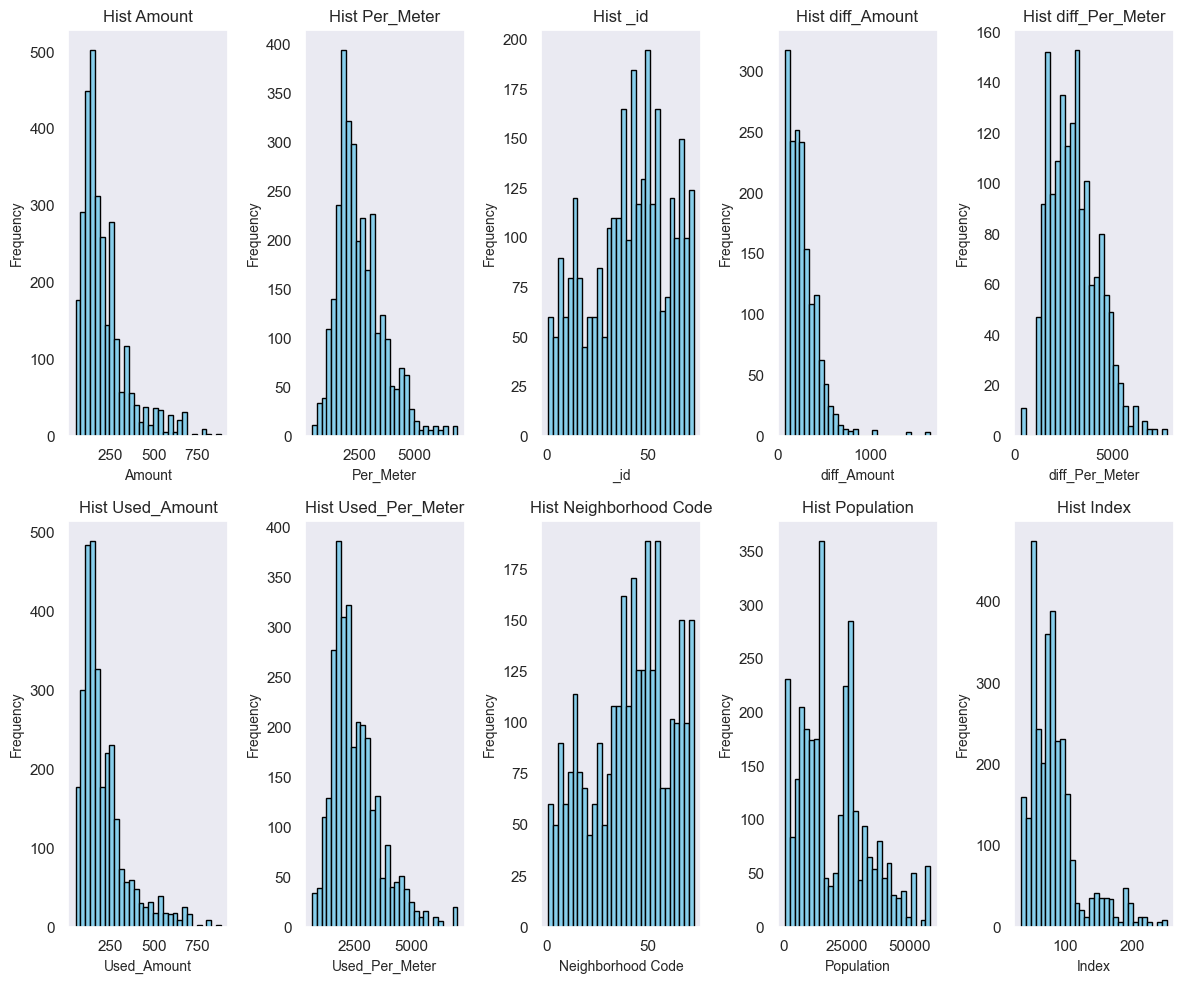

In [97]:
#Plotting histograms of continuous variables
plot_hist_mult(price_income[cont_cols],2,5,30)

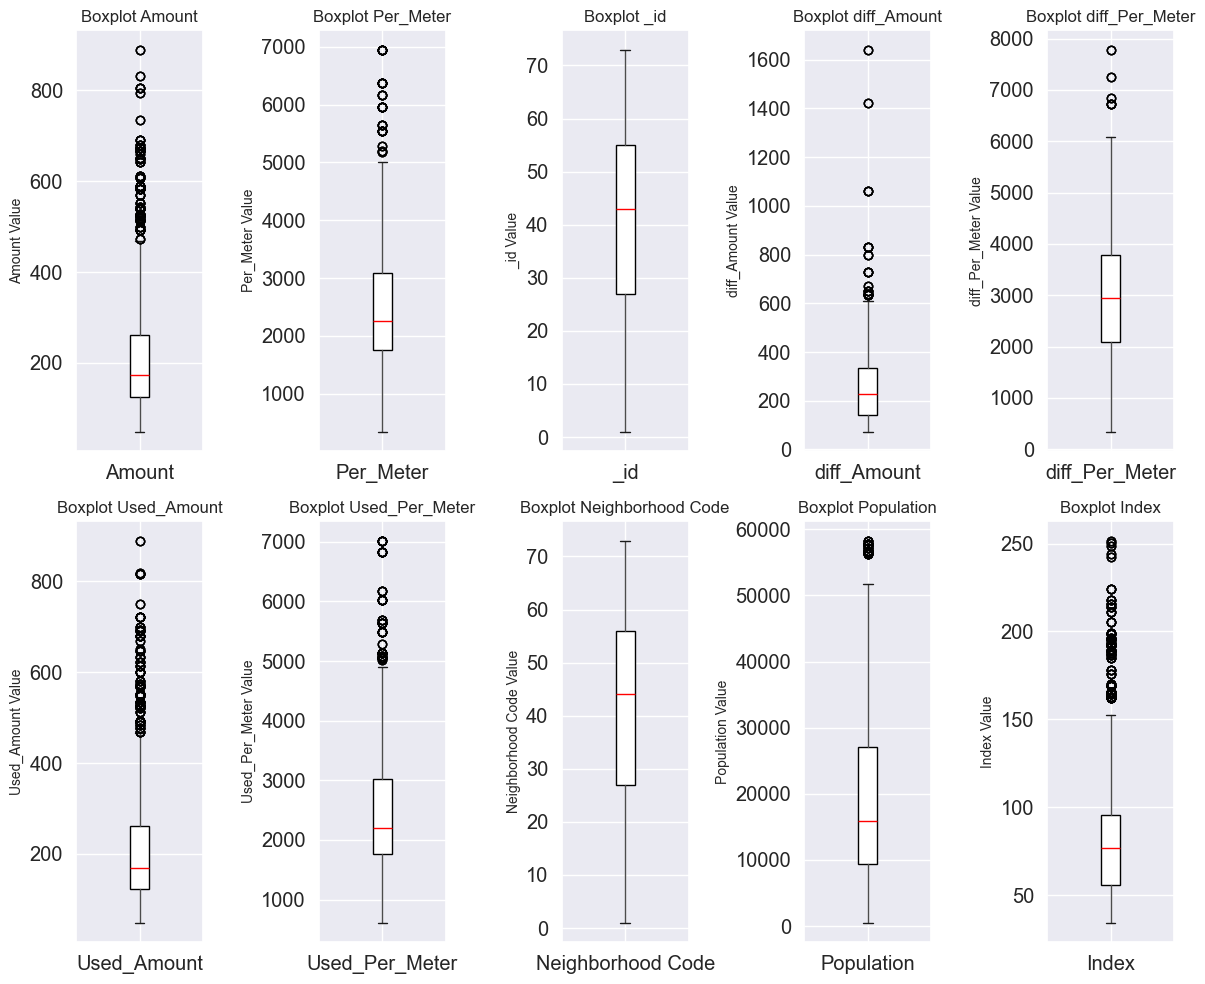

In [101]:
#Plotting boxplots of continuous variables
plot_box_mult(price_income[cont_cols],2,5)

Both the amount of meters and the price per meter are skewed to the right, indicating the presence of properties with significantly larger dimensions. This skew likely contributes to the higher prices per square meter. Additionally, we will examine other factors that may be influencing these differences.

### Studying Districts

In [102]:
# Function for plotting group by means
def groupby_table(dataset,M):
    #Plotting both perc and accum
    #Plot both mean  and median as lines
    fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7, figsize=(14,8))
    dataset.plot(x= M, y='Amount' , kind= 'bar', ax=ax1,fontsize=8)
    dataset.plot(x=M, y='Per_Meter' , kind= 'bar', ax=ax2,fontsize=8)
    dataset.plot(x=M, y='diff_Amount', kind = 'bar',ax = ax3,fontsize=8)
    dataset.plot(x=M, y='diff_Per_Meter' , kind= 'bar', ax=ax4,fontsize=8)
    dataset.plot(x=M, y='Used_Amount' , kind= 'bar', ax=ax5,fontsize=8)
    dataset.plot(x=M, y='Used_Per_Meter' , kind= 'bar', ax=ax6,fontsize=8)
    dataset.plot(x=M, y='Population' , kind= 'bar', ax=ax7,fontsize=8)

    plt.xticks(rotation=90)
    plt.show()

In [104]:
price_district = price_income.groupby(['District'])[cont_cols].mean().sort_values(by='Per_Meter',ascending = False).round(3).reset_index()
price_district.round(2)

,District,Amount,Per_Meter,_id,diff_Amount,diff_Per_Meter,Used_Amount,Used_Per_Meter,Neighborhood Code,Population,Index
0,Sarrià-Sant Gervasi,524.10,4056.20,23.50,501.48,3905.20,527.04,4054.96,24.5,24602.77,181.82
1,Les Corts,462.17,3911.76,19.00,621.94,5097.97,446.80,3794.05,20.0,27251.73,161.44
2,Sant Martí,289.83,3339.94,67.50,252.29,3045.48,291.17,3353.79,68.5,23458.82,94.04
3,Eixample,297.60,3323.61,7.50,349.88,4230.57,291.43,3213.84,7.5,44195.10,118.27
4,Ciutat Vella,238.36,3310.70,2.50,311.76,3980.22,229.30,3216.98,2.5,25455.45,88.00
5,Gràcia,263.13,3017.64,29.00,341.77,3420.45,258.24,2988.18,30.0,24200.92,103.60
6,Sants-Montjuïc,171.15,2409.26,18.66,219.77,3023.87,160.28,2280.50,14.5,22736.08,74.64
7,Sant Andreu,185.46,2334.07,59.06,212.11,2693.96,185.94,2332.66,60.0,21005.40,69.19
8,Horta-Guinardó,163.01,2197.23,36.93,170.66,2235.10,164.86,2248.49,38.0,15256.93,81.94
9,Nou Barris,111.22,1627.08,48.98,130.35,2118.70,111.22,1625.69,50.0,12750.30,51.25


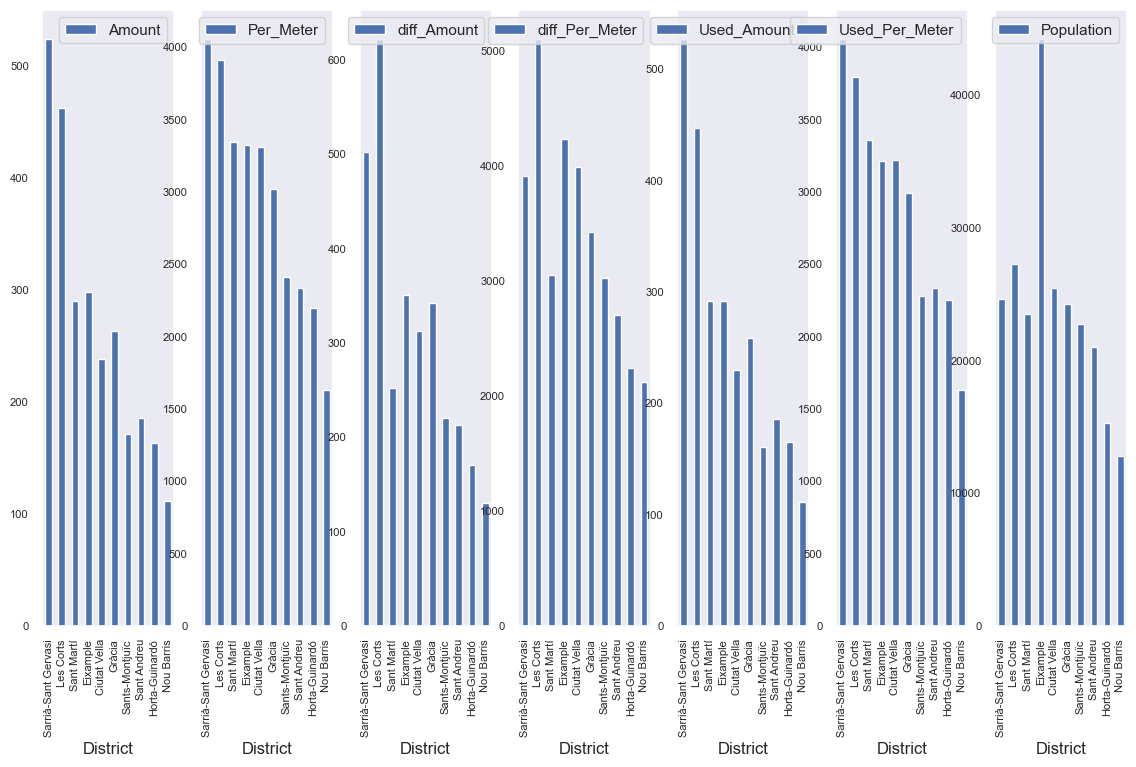

In [105]:
groupby_table(price_district,'District')

If we analyze both the size of the houses and the price per meter across different districts, we notice a strong correlation between these variables and the district where the houses are located. Sarria and Les Corts are the districts with the largest houses on average and also have the highest prices per square meter.

### Studying Years

In [106]:
price_year = price_income.groupby(['Year'])[cont_cols].mean().sort_values(by='Per_Meter',ascending = False).round(3).reset_index()
price_year.round(2)

,Year,Amount,Per_Meter,_id,diff_Amount,diff_Per_Meter,Used_Amount,Used_Per_Meter,Neighborhood Code,Population,Index
0,2017,254.77,3060.35,41.32,291.10,3527.41,253.24,3046.46,41.48,20325.06,85.16
1,2016,214.66,2524.74,41.31,280.29,3181.22,213.13,2534.73,41.42,20055.17,84.64
2,2015,206.81,2476.34,40.64,271.92,3030.78,205.54,2456.85,41.59,20174.18,84.56
3,2014,194.56,2290.69,41.03,227.41,2675.12,194.25,2284.41,41.02,20236.55,83.64
4,2013,188.75,2274.70,40.90,255.08,2847.68,188.12,2244.31,41.77,20056.22,83.03


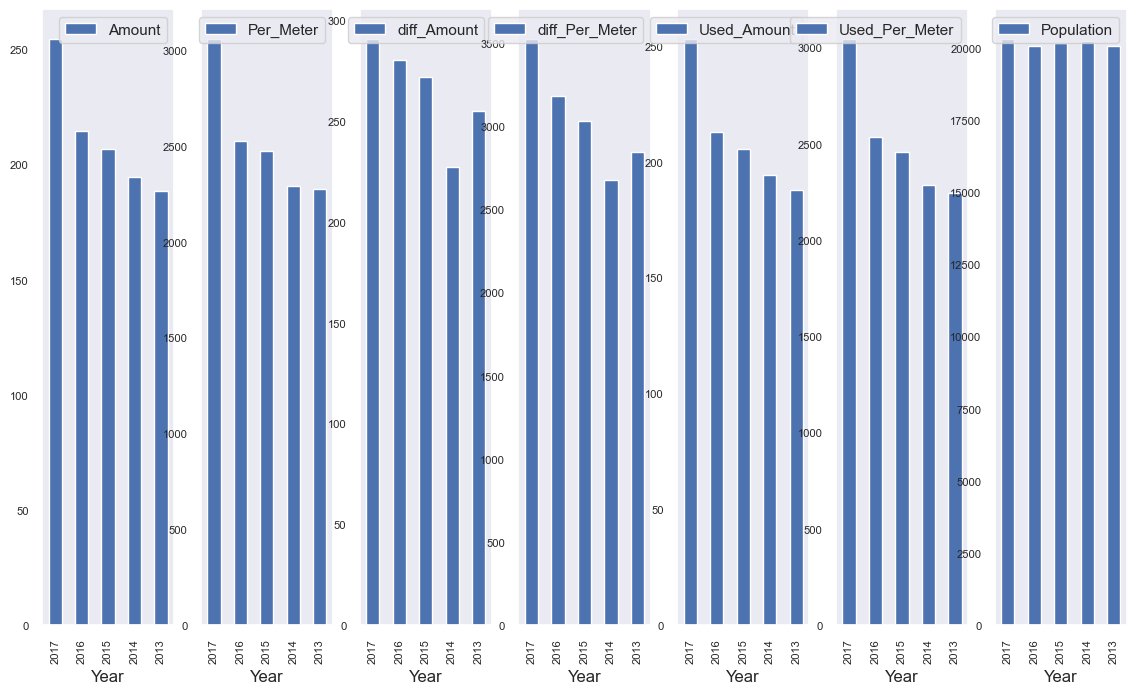

In [107]:
groupby_table(price_year,'Year')

On the other hand, if we examine the evolution of price per meter and the size of houses over the years, we see that both variables have consistently increased, with a significant spike from 2016 to 2017. It is well known that current housing policies in Barcelona and the rising demand from tourism in the city have had a considerable impact on prices.

### Checking for Missing Values

In [126]:
display(price_income.isna().mean())
print("diff_Amount and diff_Per_meter are missing almost half of their observations which is why we'll drop those columns")
print("Used Amount and User_Per_Meter have less than 1% of missing values which is why we'll just impute using KNN")

Year                 0.0
District             0.0
Amount               0.0
Per_Meter            0.0
_id                  0.0
District_Id          0.0
Neighborhood_Name    0.0
Used_Amount          0.0
Used_Per_Meter       0.0
District Code        0.0
Neighborhood Code    0.0
Population           0.0
Index                0.0
dtype: float64

diff_Amount and diff_Per_meter are missing almost half of their observations which is why we'll drop those columns
Used Amount and User_Per_Meter have less than 1% of missing values which is why we'll just impute using KNN


In [119]:
## Dropping diff_Amount & diff_Per_Meter
price_income = price_income.drop(['diff_Amount','diff_Per_Meter'],axis=1)

In [121]:
# Retrieving discrete and continuous variables
disc_cols, cont_cols  = numeric_col_split(price_income,11)
# Conitnuous columns
print('Continuous')
print(cont_cols)
# Discrete columns
print('Discrete')
print(disc_cols)

Continuous
['Amount', 'Per_Meter', '_id', 'Used_Amount', 'Used_Per_Meter', 'Neighborhood Code', 'Population', 'Index']
Discrete
['Year', 'District_Id', 'District Code']


### Imputing Missing values Used_Amount and Used_Per_Meter

In [122]:
# KNN imputation
from sklearn.impute import KNNImputer
# Create a KNNImputer object with k=3 
imputer = KNNImputer(n_neighbors=3) 

# Perform KNN imputation only on the specified columns for the training data
price_income[cont_cols] = imputer.fit_transform(price_income[cont_cols])

In [123]:
display(price_income.isna().mean())

Year                 0.0
District             0.0
Amount               0.0
Per_Meter            0.0
_id                  0.0
District_Id          0.0
Neighborhood_Name    0.0
Used_Amount          0.0
Used_Per_Meter       0.0
District Code        0.0
Neighborhood Code    0.0
Population           0.0
Index                0.0
dtype: float64

### Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix (Quantitative Variables)')

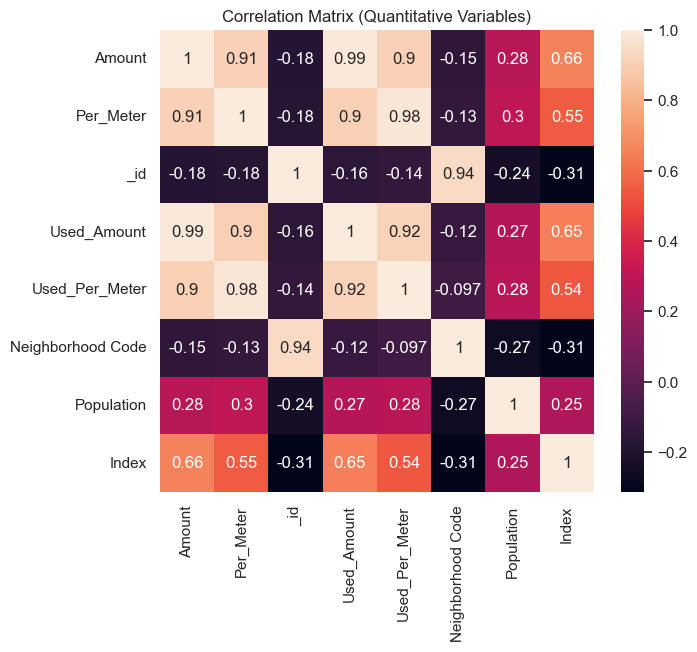

In [125]:
# Correlations among the variables 
df_for_heatmap_corr = price_income[cont_cols].corr()

# Plot correlations
fig, ax = plt.subplots(figsize=(7,6))
ax = sns.heatmap(df_for_heatmap_corr, annot = True, )
plt.title('Correlation Matrix (Quantitative Variables)')

In terms of correlation, Price per meter is highly correlated with Amount (size of the house) with a score of 0.9

---

### Defining Metrics to Monitor

1. Evolution of Population distribution per District (Monitoring the size of the population for each district)
2. Evolution of Avg price per meter per District (Monitoring the price per meter for each district)
3. Avg price per meter by neighborhood - Vars Year, District (Deeper look into each district to see best prices per neighborhood)
4. Distribution of the Amount of meters vs Amount of used meters - Vars Year, District (Deep look into house sizes and their used space)

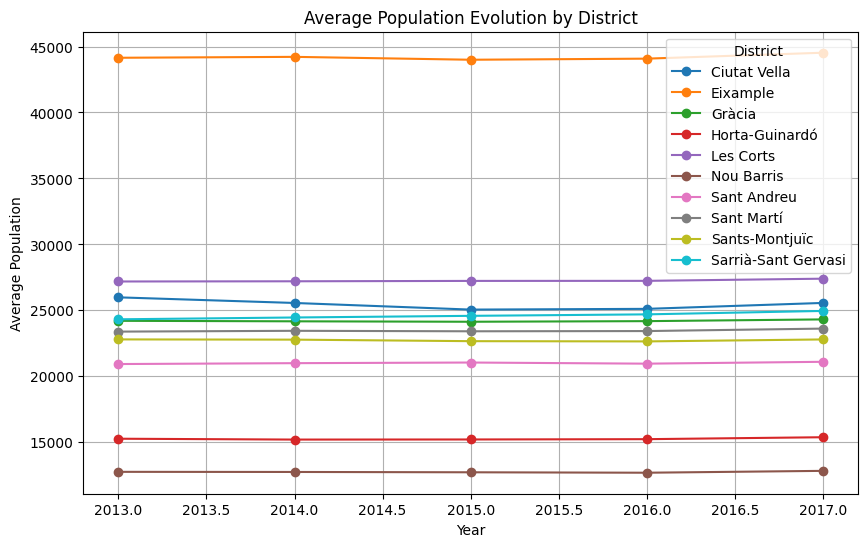

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Year and District to calculate the average Per_Meter
avg_population = price_income.groupby(['Year', 'District'])['Population'].mean().reset_index()

# Pivot the DataFrame to have Years as rows and Districts as columns
pivot_df = avg_population.pivot(index='Year', columns='District', values='Population')

# Plot the data
pivot_df.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Average Population Evolution by District')
plt.xlabel('Year')
plt.ylabel('Average Population')
plt.legend(title='District')
plt.grid(True)
plt.show()

In [79]:
from ipywidgets import interact, widgets
# Function to plot the data
def plot_avg_population(year, district):
    filtered_df = price_income[(price_income['Year'] == year) & (price_income['District'] == district)]
    
    plt.figure(figsize=(10, 6))
    plt.bar(filtered_df['Neighborhood_Name'], filtered_df['Population'], color='skyblue')
    plt.xlabel('Neighborhood')
    plt.ylabel('Average Population')
    plt.title(f'Average Population in {district} (Year: {year})')
    plt.xticks(rotation=90)
    plt.show()

# Get unique years and districts for the dropdown menus
years = avg_population['Year'].unique()
districts = avg_population['District'].unique()

# Create interactive widgets
interact(plot_avg_population, year=widgets.Dropdown(options=years, description='Year'), district=widgets.Dropdown(options=districts, description='District'))


interactive(children=(Dropdown(description='Year', options=(2013, 2014, 2015, 2016, 2017), value=2013), Dropdo…

<function __main__.plot_avg_population(year, district)>

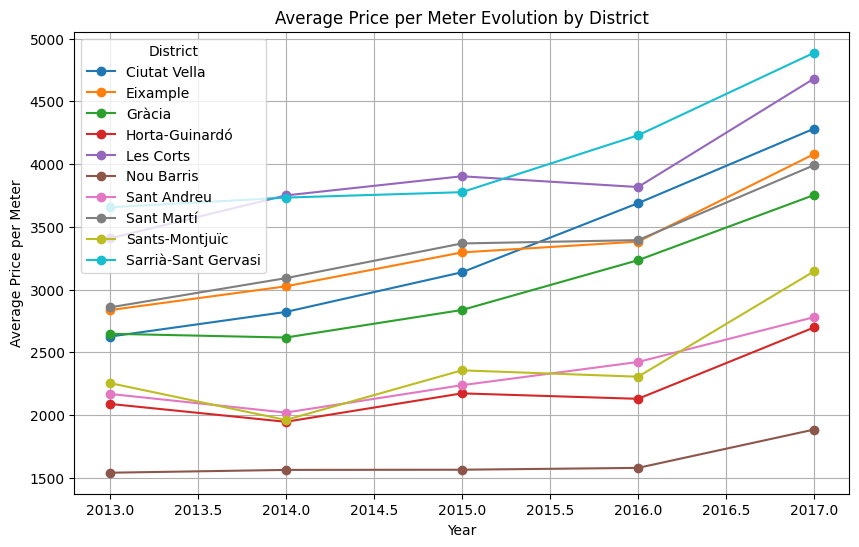

In [70]:
# Group by Year and District to calculate the average Per_Meter
avg_price_per_meter = price_income.groupby(['Year', 'District'])['Per_Meter'].mean().reset_index()

# Pivot the DataFrame to have Years as rows and Districts as columns
pivot_df = avg_price_per_meter.pivot(index='Year', columns='District', values='Per_Meter')

# Plot the data
pivot_df.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Average Price per Meter Evolution by District')
plt.xlabel('Year')
plt.ylabel('Average Price per Meter')
plt.legend(title='District')
plt.grid(True)
plt.show()

In [74]:
from ipywidgets import interact, widgets
# Function to plot the data
def plot_avg_price(year, district):
    filtered_df = price_income[(price_income['Year'] == year) & (price_income['District'] == district)]
    
    plt.figure(figsize=(10, 6))
    plt.bar(filtered_df['Neighborhood_Name'], filtered_df['Per_Meter'], color='skyblue')
    plt.xlabel('Neighborhood')
    plt.ylabel('Average Price per Meter')
    plt.title(f'Average Price per Meter in {district} (Year: {year})')
    plt.xticks(rotation=90)
    plt.show()

# Get unique years and districts for the dropdown menus
years = avg_price_per_meter['Year'].unique()
districts = avg_price_per_meter['District'].unique()

# Create interactive widgets
interact(plot_avg_price, year=widgets.Dropdown(options=years, description='Year'), district=widgets.Dropdown(options=districts, description='District'))


interactive(children=(Dropdown(description='Year', options=(2013, 2014, 2015, 2016, 2017), value=2013), Dropdo…

<function __main__.plot_avg_price(year, district)>

In [76]:
# Function to plot the data
def plot_distribution(year, district):
    filtered_df = price_income[(price_income['Year'] == year) & (price_income['District'] == district)]
    
    neighborhoods = filtered_df['Neighborhood_Name'].unique()
    amount_data = [filtered_df[filtered_df['Neighborhood_Name'] == n]['Amount'] for n in neighborhoods]
    used_amount_data = [filtered_df[filtered_df['Neighborhood_Name'] == n]['Used_Amount'] for n in neighborhoods]
    
    fig, ax = plt.subplots(figsize=(14, 8))

    # Combine amount and used amount data for plotting
    combined_data = []
    labels = []
    for i, neighborhood in enumerate(neighborhoods):
        combined_data.append(filtered_df[filtered_df['Neighborhood_Name'] == neighborhood]['Amount'])
        combined_data.append(filtered_df[filtered_df['Neighborhood_Name'] == neighborhood]['Used_Amount'])
        labels.append(f"{neighborhood} - Amount")
        labels.append(f"{neighborhood} - Used Amount")

    # Plotting the combined boxplot
    ax.boxplot(combined_data, labels=labels, patch_artist=True)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of Amount and Used Amount in {district} (Year: {year})')
    plt.xlabel('Neighborhood')
    plt.ylabel('Value')
    plt.tight_layout()
    plt.show()

# Get unique years and districts for the dropdown menus
years = price_income['Year'].unique()
districts = price_income['District'].unique()

# Create interactive widgets
interact(plot_distribution, year=widgets.Dropdown(options=years, description='Year'), district=widgets.Dropdown(options=districts, description='District'))



interactive(children=(Dropdown(description='Year', options=(2017, 2016, 2014, 2013, 2015), value=2017), Dropdo…

<function __main__.plot_distribution(year, district)>